In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

RESULTS_DIR = "results"
assert os.path.exists(RESULTS_DIR), "❌ results/ folder not found — run model notebooks first"


In [2]:
df_t = pd.read_csv("results/Transformer.csv")
df_g = pd.read_csv("results/GNN.csv")
df_h = pd.read_csv("results/Hybrid.csv")   # from hybrid notebook

df = pd.concat([df_t, df_g, df_h], ignore_index=True)
df


,Model,Accuracy,Precision,Recall,F1
0,Transformer,0.927639,0.930289,0.500069,0.650478
1,GNN,0.954695,0.878679,0.769821,0.820656
2,Hybrid,0.967430,0.975300,0.777815,0.865434


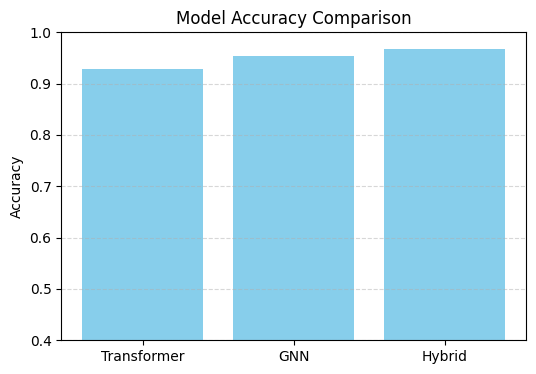

In [3]:
plt.figure(figsize=(6,4))
plt.bar(df["Model"], df["Accuracy"], color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("results/accuracy_compare.png")
plt.show()


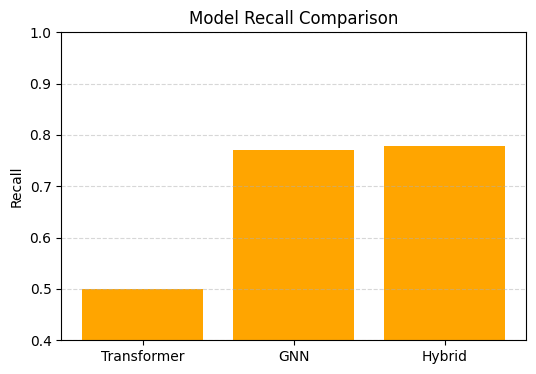

In [4]:
plt.figure(figsize=(6,4))
plt.bar(df["Model"], df["Recall"], color="orange")
plt.title("Model Recall Comparison")
plt.ylabel("Recall")
plt.ylim(0.4, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("results/recall_compare.png")
plt.show()


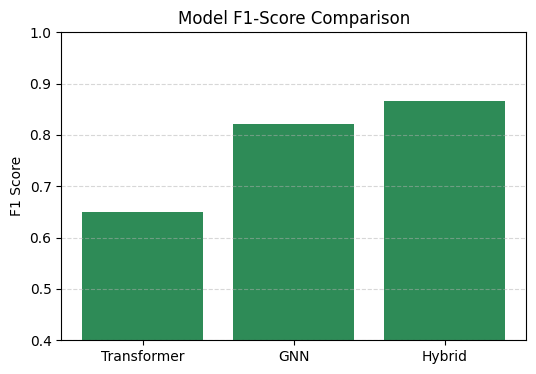

In [5]:
plt.figure(figsize=(6,4))
plt.bar(df["Model"], df["F1"], color="seagreen")
plt.title("Model F1-Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0.4, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("results/f1_compare.png")
plt.show()


In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_DIR = "results"
assert os.path.exists(RESULTS_DIR), "❌ 'results' folder not found — run model notebooks first."

csv_files = glob.glob(os.path.join(RESULTS_DIR, "*.csv"))
print("Found CSV files:")
for f in csv_files:
    print("  -", os.path.basename(f))

dfs = []
for path in csv_files:
    try:
        df_temp = pd.read_csv(path)
        # Basic sanity check
        expected_cols = {"Model", "Accuracy", "Precision", "Recall", "F1"}
        if not expected_cols.issubset(df_temp.columns):
            print(f"⚠️ Skipping {path}, missing expected columns")
            continue
        dfs.append(df_temp)
    except Exception as e:
        print(f"⚠️ Error reading {path}: {e}")

assert dfs, "❌ No valid metric CSVs found."

df = pd.concat(dfs, ignore_index=True)

# In case some models are repeated / retrained, keep best F1 per model
df_grouped = df.groupby("Model", as_index=False).agg({
    "Accuracy": "max",
    "Precision": "max",
    "Recall": "max",
    "F1": "max",
})

# Sort by F1 descending
df_sorted = df_grouped.sort_values(by="F1", ascending=False).reset_index(drop=True)
df_sorted


Found CSV files:
  - Autoencoder.csv
  - GNN.csv
  - Hybrid.csv
  - IsolationForest.csv
  - LightGBM.csv
  - LSTM.csv
  - MLP.csv
  - RandomForest.csv
  - Transformer.csv
  - XGBoost.csv


,Model,Accuracy,Precision,Recall,F1
0,Hybrid,0.967430,0.975300,0.777815,0.865434
1,GNN,0.954695,0.878679,0.769821,0.820656
2,Transformer,0.927639,0.930289,0.500069,0.650478
3,Autoencoder,0.618346,0.838617,0.255937,0.392183
4,LSTM,0.592959,0.750143,0.230783,0.352973
5,MLP,0.602606,0.914501,0.191909,0.317243
6,LightGBM,0.598121,0.998934,0.164820,0.282953
7,IsolationForest,0.533553,0.546430,0.179068,0.269740
8,XGBoost,0.536769,0.990698,0.037467,0.072203
9,RandomForest,0.519929,1.000000,0.002111,0.004213


In [3]:
summary_path = os.path.join(RESULTS_DIR, "model_summary_all.csv")
df_sorted.to_csv(summary_path, index=False)
print(f"📁 Full model summary saved to: {summary_path}")
df_sorted


📁 Full model summary saved to: results\model_summary_all.csv


,Model,Accuracy,Precision,Recall,F1
0,Hybrid,0.967430,0.975300,0.777815,0.865434
1,GNN,0.954695,0.878679,0.769821,0.820656
2,Transformer,0.927639,0.930289,0.500069,0.650478
3,Autoencoder,0.618346,0.838617,0.255937,0.392183
4,LSTM,0.592959,0.750143,0.230783,0.352973
5,MLP,0.602606,0.914501,0.191909,0.317243
6,LightGBM,0.598121,0.998934,0.164820,0.282953
7,IsolationForest,0.533553,0.546430,0.179068,0.269740
8,XGBoost,0.536769,0.990698,0.037467,0.072203
9,RandomForest,0.519929,1.000000,0.002111,0.004213


In [4]:
def plot_metric_bar(df, metric, save_name, color):
    plt.figure(figsize=(8, 4))
    plt.bar(df["Model"], df[metric], color=color)
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1.0)
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    out_path = os.path.join(RESULTS_DIR, save_name)
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    plt.show()
    print(f"📊 Saved {metric} plot to {out_path}")


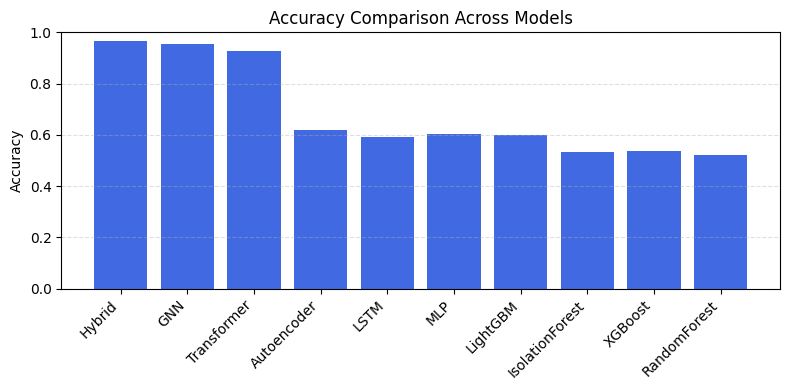

📊 Saved Accuracy plot to results\accuracy_compare_all.png


In [5]:
plot_metric_bar(df_sorted, "Accuracy", "accuracy_compare_all.png", "royalblue")


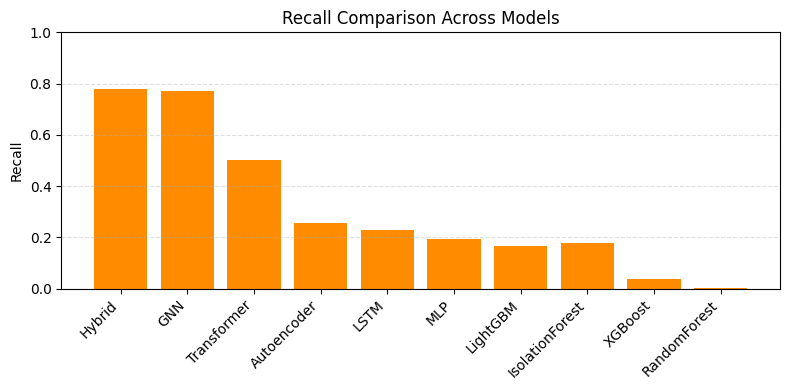

📊 Saved Recall plot to results\recall_compare_all.png


In [7]:
plot_metric_bar(df_sorted, "Recall", "recall_compare_all.png", "darkorange")


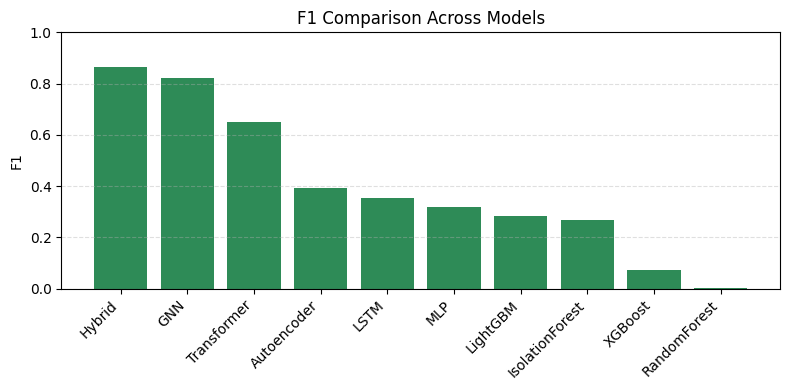

📊 Saved F1 plot to results\f1_compare_all.png


In [8]:
plot_metric_bar(df_sorted, "F1", "f1_compare_all.png", "seagreen")
